In [22]:
#Dependencies
import datetime
from datetime import timedelta
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from sqlalchemy import extract 
from sqlalchemy import Column, Integer, DateTime
from sqlalchemy.sql.expression import exists
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from sqlalchemy import distinct
from sqlalchemy import func
from sqlalchemy import desc

In [23]:
engine = create_engine('sqlite:///hawaii4.sqlite', echo=False)
session= Session(bind=engine)

In [24]:
Base=automap_base()

In [25]:
Base.prepare(engine, reflect=True)

In [26]:
Base.classes.keys()

['measurements', 'stations']

In [27]:
#create variables to reference both tables
Measurements=Base.classes.measurements
Stations= Base.classes.stations

In [28]:
Measurements.__table__.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [29]:
#Precipitation Analysis
#Design a query to retrieve the last 12 months of precipitation data.
#Select only the date and prcp values.
#Load the query results into a Pandas DataFrame and set the index to the date column.
#Plot the results using the DataFrame plot method.

#Sqlalchemy statement for precipitation analyis
Precipitation = session.query(Measurements.date, Measurements.prcp).statement

#Convert sqlalchemy query to dataframe
precip_df = pd.read_sql_query(Precipitation, session.bind)


In [30]:
precip_df['date'] = pd.to_datetime(precip_df.date)

In [31]:
pastdate="2016-08-24"
precip_df= precip_df[precip_df['date'] >= pastdate]


In [32]:
precip_df=precip_df.set_index("date")

<IPython.core.display.Javascript object>


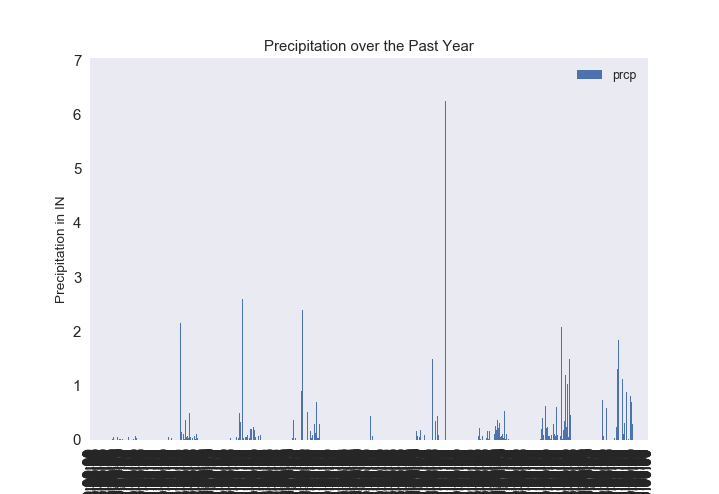

In [34]:
precip_df.plot.bar(title="Precipitation over the Past Year" , fontsize="large")
plt.xlabel("Date")
plt.ylabel("Precipitation in IN")
plt.grid()
plt.show()

In [38]:
precip_df.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [14]:
#Total count of stations
station_total= session.query(Stations.station).count()
print(station_total)

9


In [54]:
most_observations=session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).order_by(desc(func.count(Measurements.tobs))).first()
most_observations

('USC00519281', 2772)

In [ ]:
for a,b in session.query(Stations, Measurements).filter(Stations.stations==Measurements.stations)